# Feature Selection Techniques  (Dimensionality Reduction Techniques)

###### What Is Feature Selection in Machine Learning?

The goal of feature selection techniques in machine learning is to find the best set of features that allows one to build optimized models of studied phenomena.

The techniques for feature selection in machine learning can be broadly classified into the following categories:


###### Supervised Techniques: 
    
These techniques can be used for labeled data and to identify the relevant features for increasing the efficiency of supervised models like classification and regression. For Example- linear regression, decision tree, SVM, etc.

###### Unsupervised Techniques: 
    
These techniques can be used for unlabeled data. For Example- K-Means Clustering, Principal Component Analysis, Hierarchical Clustering, etc.

In [398]:
import warnings
warnings.filterwarnings('ignore')

###### Why Feature Selection is Important in Machine Learning?

 *  Curse of Dimensionality: There are certain ML algorithim where your model affect if higher dimensionality. Hence we reduce it.
 *  Complexity : Model will take much time for calculation if we have more features.
 *  Interpretability  : ML also used for INFER. The lesser feature will help you to understand your model, you can make inferential statement between DV and IV.
 
  *  Easiear to understand model.
  *  Better performance model.
  *  Model Run Fasters

### Basic and very common Steps for feature selection process:-

###### Remove duplicate features

Sometime in our dataset we get same columns twice/thrice then we can keep one of them and drop rest of columns

###### Remove null values or missing values features
We should handle null values first and then move to below three feature selection process. 

###### High Percentage Missing Value :
We should handle null values first and then move to below three feature selection process. 

#### Data Leakage

Before we start following feature selection methods - we should split the dataset into train and test dataset. It is a thumb rule to 
split into train/test, otherwise there are chances to data leakage. (e.g. our test dataset shouldn't know about train test feature)

## Three Categories of feature selection:-

### 1. Filter Method

Filter based techniques are methods that are use statistical measure to score each feature indepenently, and then select a subset of 
feature based on these scores.These methods are called 'Filter Method' because eventually they filter out the feature on their score based on some criteria.

###### A. Variance Threshold
###### B.  Correlation Coefficient
###### C. Anova Test
###### D. Chi Square Test

### 2. Wrapper Method

##### A. Exhaustive Feature Selection/Best Subset Selection (No more in python)

###### B. Forward Selection

###### c. Backward Elemination

##### D. Recursive Feature Elemination

Note: Wrapper method should be used when your dataset is very less.

The process involves developing a model with the remaining features after repeatedly removing the least significant parts until the desired number of features is obtained.

###### Steps in RFE:--

### 3. Embedded Methods

###### A. LASSO

# Model Canser Dataset to predict patient health

In [399]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
df_array = datasets.load_breast_cancer()
# Converting array dataset into dataframe
df = pd.DataFrame(df_array.data,columns=df_array.feature_names)
df.head(2)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [400]:
#Concating output feature to main dataset
df['target']=df_array['target']

###### Remove Duplicate Columns - If Any

In [401]:
def rem_duplicate_col(df):
    col_len=len(list(df.columns))
    No_duplicate_col=[]
    duplicate_col = []
    for col in range(0,col_len):
        if list(df.columns)[col] not in No_duplicate_col:
            No_duplicate_col.append(col)
        else:
            duplicate_col.append(col)
    if  len(duplicate_col) > 0:
        print('Duplicate Column found : ' , duplicate_col)
    else:
        print('No Duplicate Column Found.')

In [402]:
from sklearn.model_selection import train_test_split
X = df.iloc[:,:-1]
y=df.iloc[:,-1]
X_Train,X_Test,y_Train,y_Test = train_test_split(X,y,train_size = 0.8,random_state = 0)

In [403]:
rem_duplicate_col(df)

No Duplicate Column Found.


## Multicollinearity

Collinearity is a linear association between two explanatory variables. Two variables are perfectly collinear if there is an exact linear relationship between them. 
Multicollinearity refers to a situation in which more than two explanatory variables in a multiple regression model are highly linearly related.

###### How to detect Multicollinearity

 *  Domain Knowledge : If you have good  domain knowledge you can easily understand two IV may have multicollinearity
 *  Scatter Plot : With the help of scatter plot of two IV you can see is there any relationship. Have to plot multiple plots.
 *  Correlation Function: With Corr() function you can see which two features are having more relationship.  Threshold .9 or .08
 *  Variance Influence Factor : You can use VIF - if vif is greater than 5 then you can remove these feature.

### Implementing VIF using statsmodels:

For VIF - we need only IV. We will make a loop and pick variable one by one and make a linear regression with other features.

In [509]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
import statsmodels.api as sm

In [506]:
print(X_Test.shape)
print(X_Train.shape)
print(X_Train.columns)

(102, 13)
(404, 13)
Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat'],
      dtype='object')


###### Calculate VIF Factors

###### First way of VIF

In [512]:
#vif_ = pd.DataFrame()
#vif(X_Test.values, i) for i in range(X_Test.shape[1])
#vif_["features"] = X.columns
# For each X, calculate VIF and save in dataframe
X = X_Train
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif

,VIF Factor,features
0,2.017452,crim
1,3.132732,zn
2,13.756002,indus
3,1.167461,chas
4,73.260193,nox
5,79.012462,rm
6,21.452509,age
7,15.961636,dis
8,16.491841,rad
9,65.139542,tax


###### Second Way for VIF

In [515]:
col = X_Test.columns
for i in range(0,len(X_Test.columns)):
    y = X_Test.loc[: , X_Test.columns==col[i]]
    x = X_Test.loc[: , X_Test.columns!=col[i]]
    model=sm.OLS(y,x)
    results= model.fit()
    rsquare=results.rsquared
    vif= round(1/(1-rsquare),2)
    print('rsquare  of ' , col[i] , ' : ' , rsquare, '  ', 'VIF of ' , col[i] , ' : ' , vif)
    
    

rsquare  of  crim  :  0.7434246350495224    VIF of  crim  :  3.9
rsquare  of  zn  :  0.5478169792716303    VIF of  zn  :  2.21
rsquare  of  indus  :  0.9514676303654372    VIF of  indus  :  20.6
rsquare  of  chas  :  0.17616666688933835    VIF of  chas  :  1.21
rsquare  of  nox  :  0.9878406929046671    VIF of  nox  :  82.24
rsquare  of  rm  :  0.9870315588848078    VIF of  rm  :  77.11
rsquare  of  age  :  0.9585542212659053    VIF of  age  :  24.13
rsquare  of  dis  :  0.9203303107186741    VIF of  dis  :  12.55
rsquare  of  rad  :  0.9290731439928506    VIF of  rad  :  14.1
rsquare  of  tax  :  0.9839041953976262    VIF of  tax  :  62.13
rsquare  of  ptratio  :  0.9880259610862815    VIF of  ptratio  :  83.51
rsquare  of  b  :  0.953925651782058    VIF of  b  :  21.7
rsquare  of  lstat  :  0.9028746118375448    VIF of  lstat  :  10.3


# 1. Filter Method

###### Filter Methods: Advantages

They are computationally inexpensive, you can process thousands of features in a matter of seconds.

Filter methods are very good for eliminating irrelevant, redundant, constant, duplicated, and correlated features.

## Variance Threshold Method

###### Two types of feature:-

 *  Constant Feature: In your dataset if a column value is always 1 or 2 or 3, means the same number. so the variance of that particular feature zero. There is no importance of that particular column to predict output column. you will directly delete that feature.

 *  Quasi Constant Feature: In your dataset of 1000 records if 995 records are male and 5 records are female. These are quasi constant feature. you can see that these feature is also not valuable to predict ouptut column, so you can delete/drop.

###### Steps in Variance Threshold Method:-

In [404]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold = 0.05)   # There is long discussion/calculation required to give threshold number , generally we give value from .1 to .01. so we use 0.05. Before that your dataset should be standardize/normalize

In [405]:
# fit the X_Train Columns
sel.fit(X_Train)

VarianceThreshold(threshold=0.05)

In [406]:
sel.get_support()

array([ True,  True,  True,  True, False, False, False, False, False,
       False,  True,  True,  True,  True, False, False, False, False,
       False, False,  True,  True,  True,  True, False, False, False,
       False, False, False])

In [407]:
# Out of 30 only 12 columns are greater variance than given threshold
sel.get_support().sum()

12

In [408]:
# This code will give column which are greater variance than threshold and it will convert it in an array
X_Train = sel.transform(X_Train)
X_Test = sel.transform(X_Test)
type(X_Test)

numpy.ndarray

In [409]:
# Converting them back to Panda Dataframe
X_Train = pd.DataFrame(X_Train)
X_Test = pd.DataFrame(X_Test)
print(type(X_Test))
print(X_Test.shape)

<class 'pandas.core.frame.DataFrame'>
(114, 12)


### Cons of Variance Threshold Method

###### *   Ignore Relation with IV with DV : 
It may be a feature with low variance is having good relation with dependent variable, or high variance variable have very low relation with dependent variable. We just focus on IV variance that  impact our model.

###### *   Ignore Feature Interaction: 
It ignote the feature interaction between IV. suppose one IV is become very import if you use it with IV second and may beneficial for model. But with Variance Threshold we wil delete column which has lesser variance threshold.


###### *   Sensative to feature scalling:-
We have to scale the feature before using this technique. Support one feature is salary in 10000,12000,13000 and other feature is work experience in years 10,13,14 yrs. So if you follow this technique without scaling then always be salary feature variance would be higher than experience. 

###### *   Arbitary Threshold Value:
There is no fixed threshold value or any calculation method to get it. Generally, we give any value from 0.1 to 0.01 and it gives us the good features. but there is no fixed threshold number.

## Pearson Correlation Coefficient

In this technique we try to findout the relationship between IV with DV one by one. That value comes from -1 to 1. If the value is near to -1 means there is a highly negetive relation between IV and DV. however it the value is near to 1 means there is highly positive relation between IV and DV.

If the value is near to 0 - means there is no linear relation between IV and DV

#### Two methods are:
1. Check relation between all IV to DV and give a threshold e.g. (-0.3 to 0.3) , whaterver columns comes between this threshold you will directly drop them. They are not highly correlated with dependent variable.

2. Check relation between all IV with other IV. Means F1 feature will check correlation with F2, then F1 with F3 and so on. Then 
we will give some threshold and remove feature which are having greater correlation than threshold. That ways we will also handle  *  multicollinearity *  .
###### Multicollearity also handled.

In [410]:
X = df.iloc[:,:-1]
y=df.iloc[:,-1]
X_Train,X_Test,y_Train,y_Test = train_test_split(X,y,train_size = 0.8,random_state = 0)
print('Shape of X Train : ' , X_Train.shape)

Shape of X Train :  (455, 30)


<AxesSubplot:>

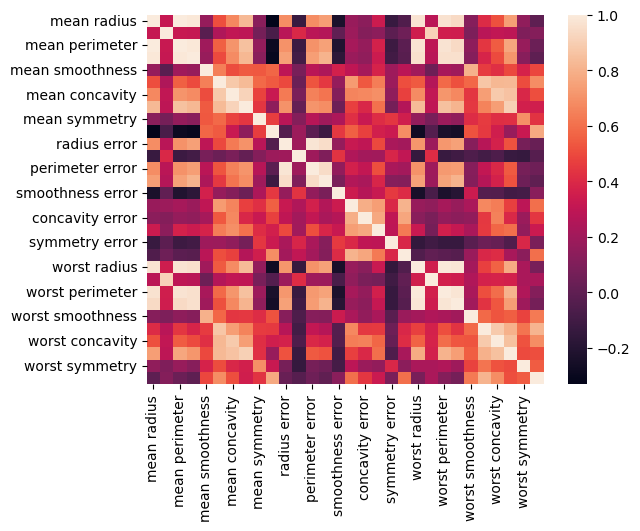

In [411]:
sns.heatmap(X_Train.corr())

In [412]:
X_Train.corr()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
mean radius,1.000000,0.316083,0.998185,0.987094,0.164226,0.508985,0.669625,0.823662,0.130193,-0.330992,...,0.969537,0.281647,0.966220,0.941185,0.116935,0.403744,0.511501,0.736397,0.149669,-0.004484
mean texture,0.316083,1.000000,0.322445,0.318626,-0.023107,0.241977,0.298975,0.292473,0.064376,-0.071964,...,0.349677,0.908182,0.354636,0.348051,0.093454,0.273151,0.298302,0.289088,0.098803,0.115940
mean perimeter,0.998185,0.322445,1.000000,0.986692,0.197597,0.555299,0.705993,0.850247,0.161548,-0.286012,...,0.969520,0.288406,0.970507,0.941920,0.145972,0.442236,0.545424,0.762361,0.171204,0.035518
mean area,0.987094,0.318626,0.986692,1.000000,0.170459,0.500276,0.679675,0.823160,0.131129,-0.302548,...,0.961717,0.276386,0.959382,0.958527,0.120212,0.380076,0.498019,0.712975,0.126243,-0.008425
mean smoothness,0.164226,-0.023107,0.197597,0.170459,1.000000,0.643792,0.503715,0.540170,0.536098,0.569111,...,0.202340,0.039730,0.222953,0.196480,0.800811,0.454826,0.418035,0.491856,0.374436,0.487641
mean compactness,0.508985,0.241977,0.555299,0.500276,0.643792,1.000000,0.879782,0.832933,0.583548,0.540311,...,0.537510,0.257121,0.583536,0.511644,0.577326,0.865480,0.818573,0.825494,0.501795,0.685937
mean concavity,0.669625,0.298975,0.705993,0.679675,0.503715,0.879782,1.000000,0.914627,0.477989,0.326375,...,0.679315,0.299400,0.713638,0.668894,0.442474,0.735011,0.880653,0.856157,0.387143,0.506538
mean concave points,0.823662,0.292473,0.850247,0.823160,0.540170,0.832933,0.914627,1.000000,0.443281,0.143624,...,0.829558,0.293345,0.852132,0.808452,0.447236,0.654748,0.739295,0.906312,0.358796,0.354534
mean symmetry,0.130193,0.064376,0.161548,0.131129,0.536098,0.583548,0.477989,0.443281,1.000000,0.460547,...,0.161466,0.075811,0.188754,0.152443,0.410912,0.454890,0.412594,0.418307,0.688489,0.429271
mean fractal dimension,-0.330992,-0.071964,-0.286012,-0.302548,0.569111,0.540311,0.326375,0.143624,0.460547,1.000000,...,-0.276891,-0.037746,-0.237261,-0.254045,0.517432,0.451716,0.352917,0.168906,0.329159,0.771562


In [413]:
# We will create a loop to get a list of columns whose correlation with other columns is greater than .95
col_matrics = X_Train.corr()
columns = col_matrics.columns
col_to_drop = []
for i in range(len(columns)):
    for j in range(i+1 , len(columns)):
        if col_matrics.loc[columns[i], columns[j]]> 0.95:
            col_to_drop.append(columns[j])
            
col_to_drop=set(col_to_drop)
len(col_to_drop)
 

7

## Anova

We use ANOVA when IV are numerical features and DV is categorical with more than 2 output. This is the best scenario for ANOVA,
even though ANOVA can be use in numerica DV as well.

We have to calculate F-Ratio 

In [414]:
X = df.iloc[:,:-1]
y=df.iloc[:,-1]
X_Train,X_Test,y_Train,y_Test = train_test_split(X,y,train_size = 0.8,random_state = 0)
print('Shape of X Train : ' , X_Train.shape)

Shape of X Train :  (455, 30)


TO BE CONTINUED.....

## CHI SQUARE

It is a process to check relation between IV and DV. We use it when both IV and DV are categorical. It will not work on numerical columns. 

We have to use another dataset - where we have categorical columns.

In [415]:
import seaborn as sns
df_array = list(sns.get_dataset_names())
#print(df_array)

In [416]:
# We will use titanic dataset and pick only categorical columns
df_tit= sns.load_dataset('titanic' )
df_tit.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False


In [417]:
df = df_tit.drop(['fare','age'],axis=1)
df

,survived,pclass,sex,sibsp,parch,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,1,0,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,1,0,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,0,0,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,1,0,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,0,0,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,0,0,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,1,2,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,0,0,C,First,man,True,C,Cherbourg,yes,True


In [418]:
# Pick only categorical columns
df.head(2)

,survived,pclass,sex,sibsp,parch,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,1,0,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,1,0,C,First,woman,False,C,Cherbourg,yes,False


First we create a contingency table to get their observed value. (using crosstab)

In [419]:
# 0 = Could't survive 1 = Survive
pd.crosstab(df['sex'],df['survived'])

survived,0,1
sex,,
female,81,233
male,468,109


In [420]:
pd.crosstab(df['survived'],df['sex'], margins = True)

sex,female,male,All
survived,,,
0,81,468,549
1,233,109,342
All,314,577,891


 ######  Expected Value
 Now we will calculate the expected value

Expected Feamle Survive  = 314 * 549 / 891
Expected Male Survive = 577 * 549 / 891
Expeced Famale Not Survived = 314 * 342 / 891
Expected Male Not Survived = 577*342 / 891

In [421]:
Expected_Feamle_Survive = 314 * 549 / 891 
Expeced_Famale_Not_Survived = 314 * 342 / 891 

Expected_Male_Survive = 577 * 549 / 891 
Expected_Male_Not_Survived = 577*342 / 891

In [422]:
print(Expected_Feamle_Survive)
print(Expeced_Famale_Not_Survived)
print(Expected_Male_Survive)
print(Expected_Male_Not_Survived)

193.4747474747475
120.52525252525253
355.52525252525254
221.4747474747475


###### Calcualtion of Chi Square Statistics

In [423]:
#chi_squ_stat_1 =  (Actual Value + Expected Value ) Squre / Expected Value
chi_squ_stat_1 = (468 -  193)* (468 -  193) / 193
chi_squ_stat_2= (109-355)*(109-355) / 355
chi_squ_stat_3 = (81-120)*(81-120)/120
chi_squ_stat_4=(233-221) * (233-221) / 221

chi_squ_stat = chi_squ_stat_1 + chi_squ_stat_2 + chi_squ_stat_3 + chi_squ_stat_4
chi_squ_stat

575.633567582552

Chi Square Statistic value perform a distribution. We will calculate the P Value with above chi square statistic value.

If the P value is less than 0.05 then we reject the null hypothesis, and we assume that there is a relation ship between this feature with output feature.

In [424]:
from scipy.stats import chi2_contingency

In [425]:
# Now we will give all feature one by one to contingency object
ct = chi2_contingency(pd.crosstab(df['sex'],df['survived'], margins = True))
ct

(263.05057407065567,
 1.0036732821369117e-55,
 4,
 array([[193.47474747, 120.52525253, 314.        ],
        [355.52525253, 221.47474747, 577.        ],
        [549.        , 342.        , 891.        ]]))

In [426]:
# Now we will make a loop to get chi square stat value for all features
score = []
col_to_be_drop = []
df_col = list(df.columns)

for feature in df_col:
    ct = chi2_contingency(pd.crosstab(df['sex'],df[feature], margins = True))
    p_value =ct[1]    
    score.append(p_value)
    if p_value > 0.05:
        col_to_be_drop.append(feature)
col_to_be_drop    

['deck']

In [427]:
score

[1.0036732821369117e-55,
 0.009388562065790747,
 1.4846694608300458e-191,
 6.510223932816421e-05,
 1.0173053111907107e-07,
 0.0377235471251447,
 0.009388562065790747,
 1.3960748935189563e-169,
 7.041141254255805e-158,
 0.23257716646881968,
 0.0377235471251447,
 1.0036732821369117e-55,
 6.097416631267194e-17]

In [428]:
df.columns[:]

Index(['survived', 'pclass', 'sex', 'sibsp', 'parch', 'embarked', 'class',
       'who', 'adult_male', 'deck', 'embark_town', 'alive', 'alone'],
      dtype='object')

<AxesSubplot:>

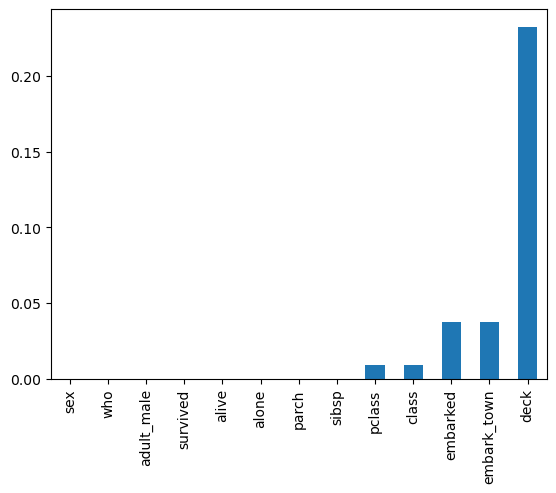

In [429]:
# Plot on bar chart to see the result
#pd.Series(score,index = df.columns[:-1].sort_values(ascending = True).plot(kind = 'bar')
pd.Series(score,index = df.columns[:]).sort_values(ascending = True).plot(kind = 'bar')

##### Conclusion

Hence the above bar chart shows the maximum number in colums ('pclass', 'class', 'embarked', 'embark_town', 'deck') we can drop them

In [430]:
col_to_be_drop

['deck']

# 2. Wrapper Method

The main idea behind a wrapper method is to select which set of features works best for a machine learning model.

A wrapper method is a feature selection technique which involves using any predictive  model to score the combination of feature.
They are called wrapper method. 

We make subset of feature and run our model on these subset of feature to get their accuracy score/r2 score. Then we pick subset of feature which gives us the best accuracy.

## A. Backword Feature Selection

In backward elimination, we start with all the features and removes the least significant feature at each iteration which improves the performance of the model. We repeat this until no improvement is observed on removal of features.

In [431]:
import pandas as pd
import seaborn as sns
print(list(sns.get_dataset_names()))

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


In [432]:
df = sns.load_dataset('titanic')
df.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False


## B. Forward Feature Selection

In forward selection, we start with a null model and then start fitting the model with each individual feature one at a time and select the feature with the higest arruracy for classificartion and less MSE/MAPE/MAE for regression models.

In [433]:
df_loan = pd.read_csv('loan_data_set.csv')
df_loan.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


In [434]:
print('Shape before drop Loand ID : ', df_loan.shape)
df_loan.drop('Loan_ID', axis = 1, inplace = True)
print('Shape after drop Loand ID : ', df_loan.shape)

Shape before drop Loand ID :  (614, 13)
Shape after drop Loand ID :  (614, 12)


In [435]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cols = df_loan.columns.tolist()
for column in cols:
    if df_loan[column].dtype == 'object':
        df_loan[column] = le.fit_transform(df_loan[column])

In [436]:
df_loan_cat_col = df_loan.select_dtypes(exclude = ['float', 'int64'])
df_loan_num_col = df_loan.select_dtypes(include = ['float', 'int64'])

In [437]:
df_loan_cat_col = df_loan_cat_col.columns

In [438]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in df_loan_cat_col:    
    df_loan[col] = le.fit_transform(df_loan[col])


In [439]:
df_loan.head(3)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,NaN,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1


In [440]:
print('Size before drop na : ', df_loan.size)
df_loan.dropna(inplace=True)
print('Size after drop na : ', df_loan.size)

Size before drop na :  7368
Size after drop na :  6348


In [441]:
X = df_loan.iloc[:,0:-1]
y = df_loan["Loan_Status"]

In [442]:
X_Train, X_Test, y_train, y_test = train_test_split(X,y,random_state = 2)

In [443]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X_Train = sc_x.fit_transform(X_Train)
X_Test = sc_x.transform(X_Test)

In [444]:
# Lets use the built in function in Python
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LogisticRegression as LGR
from sklearn.ensemble import RandomForestClassifier as rfc

In [445]:
print(X_Train.shape)
feature_names=tuple(X.columns)

(396, 11)


In [446]:
sfs1 = SFS(
           LGR(max_iter=1000),
           k_features='best', 
           forward=True,   # For forward feature selection - it should be TRUE
           floating=False, 
           verbose=2,       
           scoring='accuracy',  # sklearn classifiers
           cv=0)
sfs1 = sfs1.fit(X_Train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.0s finished

[2023-06-28 12:21:41] Features: 1/11 -- score: 0.8080808080808081[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished

[2023-06-28 12:21:41] Features: 2/11 -- score: 0.8106060606060606[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished

[2023-06-28 12:21:41] Features: 3/11 -- score: 0.8106060606060606[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

In [447]:
# Via the subsets_ attribute, we can take a look at the selected feature indices at each step:
sfs1.subsets_

{1: {'feature_idx': (9,),
  'cv_scores': array([0.80808081]),
  'avg_score': 0.8080808080808081,
  'feature_names': ('9',)},
 2: {'feature_idx': (6, 9),
  'cv_scores': array([0.81060606]),
  'avg_score': 0.8106060606060606,
  'feature_names': ('6', '9')},
 3: {'feature_idx': (0, 6, 9),
  'cv_scores': array([0.81060606]),
  'avg_score': 0.8106060606060606,
  'feature_names': ('0', '6', '9')},
 4: {'feature_idx': (0, 1, 6, 9),
  'cv_scores': array([0.81060606]),
  'avg_score': 0.8106060606060606,
  'feature_names': ('0', '1', '6', '9')},
 5: {'feature_idx': (0, 1, 2, 6, 9),
  'cv_scores': array([0.81060606]),
  'avg_score': 0.8106060606060606,
  'feature_names': ('0', '1', '2', '6', '9')},
 6: {'feature_idx': (0, 1, 2, 6, 7, 9),
  'cv_scores': array([0.81313131]),
  'avg_score': 0.8131313131313131,
  'feature_names': ('0', '1', '2', '6', '7', '9')},
 7: {'feature_idx': (0, 1, 2, 4, 6, 7, 9),
  'cv_scores': array([0.81565657]),
  'avg_score': 0.8156565656565656,
  'feature_names': ('0', '

In [448]:

sf_dic = sfs1.get_metric_dict()
sf_dic.keys()
df_accuracy = pd.DataFrame(sf_dic.values())
df_accuracy


,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
0,"(9,)",[0.8080808080808081],0.808081,"(9,)",NaN,0.0,NaN
1,"(6, 9)",[0.8106060606060606],0.810606,"(6, 9)",NaN,0.0,NaN
2,"(0, 6, 9)",[0.8106060606060606],0.810606,"(0, 6, 9)",NaN,0.0,NaN
3,"(0, 1, 6, 9)",[0.8106060606060606],0.810606,"(0, 1, 6, 9)",NaN,0.0,NaN
4,"(0, 1, 2, 6, 9)",[0.8106060606060606],0.810606,"(0, 1, 2, 6, 9)",NaN,0.0,NaN
5,"(0, 1, 2, 6, 7, 9)",[0.8131313131313131],0.813131,"(0, 1, 2, 6, 7, 9)",NaN,0.0,NaN
6,"(0, 1, 2, 4, 6, 7, 9)",[0.8156565656565656],0.815657,"(0, 1, 2, 4, 6, 7, 9)",NaN,0.0,NaN
7,"(0, 1, 2, 4, 6, 7, 8, 9)",[0.8156565656565656],0.815657,"(0, 1, 2, 4, 6, 7, 8, 9)",NaN,0.0,NaN
8,"(0, 1, 2, 4, 6, 7, 8, 9, 10)",[0.8156565656565656],0.815657,"(0, 1, 2, 4, 6, 7, 8, 9, 10)",NaN,0.0,NaN
9,"(0, 1, 2, 3, 4, 6, 7, 8, 9, 10)",[0.8156565656565656],0.815657,"(0, 1, 2, 3, 4, 6, 7, 8, 9, 10)",NaN,0.0,NaN


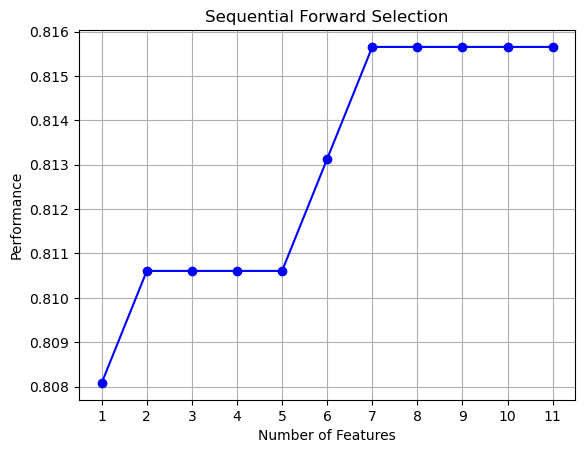

In [449]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
fig1 = plot_sfs(sfs1.get_metric_dict(confidence_interval=0.95), kind='std_err')

plt.title('Sequential Forward Selection')
plt.grid()
plt.show()

https://github.com/atulpatelDS/Youtube/blob/main/Feature_Engineering/Feature_Selection_Tutorial_7_8_9_Wrapper_Method.ipynb

### Forward Feature Selection for Regression Problem

## C. Exhaustive Feature Selection/ Best Feature Selection (Need to pip install mlextend)

This is the most robust feature selection method covered so far. This is a brute-force evaluation of each feature subset. This means that it tries every possible combination of the variables and returns the best performing subset.

#### Disadvantages of Exhaustive Feature Selection

###### Computational Complexity:-
Wrapper method create subset of all feature and then run the model on each susbset. So, it will run model on:
3 susbset if total features are 2 .
7 susbset if total features are 3 .
15 susbset if total features are 4 .

If features are N then it will run 2*N -1   (2 power N - 1)
If features are 10 then this is good, however if features are 15 or greater then it is not good option. will take much time.

###### Risk of overfitting:-

There is a risk of overfitting, if you give n number of feature it may overfit the model if you are using R-Square metrics. 
Hence you have to go with Adjust R-SQuare method.

###### Required Good Evaluation Metrics:-

When you are working on large number of columns you have to use a best metrics method. E.g. : R-Square will may give you the best result in Training dataset, however on test dataset it will not give your the best result(overfitting).

##### Advantages of Exhaustive Feature Selection

If the feature are less may be 10 or less then this method will give the best result.

In [450]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [397]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

## Classification Problem

###### Practical Implementaion Code

In [451]:
import pandas as pd
import seaborn as sns

In [453]:
print(list(sns.get_dataset_names()))

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


In [454]:
df = sns.load_dataset('iris')
df.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


In [455]:
# get mlextend feature selection
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [456]:
# Selection of best columns
#max_features =  we can give any number also - it means we want columns of that number only. Or else we can use  'BEST'
sel = EFS(lr,max_features=4, scoring='accuracy', cv = 5)
sel

ExhaustiveFeatureSelector(estimator=LogisticRegression(), max_features=4)

In [457]:
Model_EFS= sel.fit(df.iloc[:,:-1], df['species'])

Features: 15/15

Above code you can see 15 subset - because for 4 feature it will be 15 permutation/combination of features

In [458]:
# Get the best score of the model
Model_EFS.best_score_

0.9733333333333334

In [459]:
# Get the best feature names
#(sepal_length, sepal_width, petal_length, peta...
Model_EFS.best_feature_names_

('sepal_length', 'sepal_width', 'petal_length', 'petal_width')

In [460]:
# We can also see all the subset and their accuracy
col_accuracy = pd.DataFrame(Model_EFS.subsets_)
col_accuracy

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
feature_idx,"(0,)","(1,)","(2,)","(3,)","(0, 1)","(0, 2)","(0, 3)","(1, 2)","(1, 3)","(2, 3)","(0, 1, 2)","(0, 1, 3)","(0, 2, 3)","(1, 2, 3)","(0, 1, 2, 3)"
cv_scores,"[0.6666666666666666, 0.7333333333333333, 0.766...","[0.5333333333333333, 0.5666666666666667, 0.533...","[0.9333333333333333, 1.0, 0.9, 0.9333333333333...","[1.0, 0.9666666666666667, 0.9, 0.9333333333333...","[0.7333333333333333, 0.8333333333333334, 0.766...","[0.9333333333333333, 1.0, 0.9, 0.9333333333333...","[0.9333333333333333, 0.9666666666666667, 0.933...","[0.9333333333333333, 1.0, 0.9, 0.9333333333333...","[0.9333333333333333, 0.9666666666666667, 0.9, ...","[0.9666666666666667, 0.9666666666666667, 0.933...","[0.9333333333333333, 1.0, 0.9, 0.9333333333333...","[0.9, 0.9666666666666667, 0.9333333333333333, ...","[0.9666666666666667, 0.9666666666666667, 0.933...","[0.9666666666666667, 0.9666666666666667, 0.933...","[0.9666666666666667, 1.0, 0.9333333333333333, ..."
avg_score,0.753333,0.566667,0.953333,0.96,0.813333,0.953333,0.953333,0.953333,0.94,0.96,0.953333,0.946667,0.966667,0.966667,0.973333
feature_names,"(sepal_length,)","(sepal_width,)","(petal_length,)","(petal_width,)","(sepal_length, sepal_width)","(sepal_length, petal_length)","(sepal_length, petal_width)","(sepal_width, petal_length)","(sepal_width, petal_width)","(petal_length, petal_width)","(sepal_length, sepal_width, petal_length)","(sepal_length, sepal_width, petal_width)","(sepal_length, petal_length, petal_width)","(sepal_width, petal_length, petal_width)","(sepal_length, sepal_width, petal_length, peta..."


In [461]:
# Getting model output data in dataframe
df_col_accuracy = pd.DataFrame.from_dict(Model_EFS.get_metric_dict()).T
df_col_accuracy

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
0,"(0,)","[0.6666666666666666, 0.7333333333333333, 0.766...",0.753333,"(sepal_length,)",0.069612,0.05416,0.02708
1,"(1,)","[0.5333333333333333, 0.5666666666666667, 0.533...",0.566667,"(sepal_width,)",0.046932,0.036515,0.018257
2,"(2,)","[0.9333333333333333, 1.0, 0.9, 0.9333333333333...",0.953333,"(petal_length,)",0.051412,0.04,0.02
3,"(3,)","[1.0, 0.9666666666666667, 0.9, 0.9333333333333...",0.96,"(petal_width,)",0.049963,0.038873,0.019437
4,"(0, 1)","[0.7333333333333333, 0.8333333333333334, 0.766...",0.813333,"(sepal_length, sepal_width)",0.069612,0.05416,0.02708
5,"(0, 2)","[0.9333333333333333, 1.0, 0.9, 0.9333333333333...",0.953333,"(sepal_length, petal_length)",0.051412,0.04,0.02
6,"(0, 3)","[0.9333333333333333, 0.9666666666666667, 0.933...",0.953333,"(sepal_length, petal_width)",0.034274,0.026667,0.013333
7,"(1, 2)","[0.9333333333333333, 1.0, 0.9, 0.9333333333333...",0.953333,"(sepal_width, petal_length)",0.051412,0.04,0.02
8,"(1, 3)","[0.9333333333333333, 0.9666666666666667, 0.9, ...",0.94,"(sepal_width, petal_width)",0.032061,0.024944,0.012472
9,"(2, 3)","[0.9666666666666667, 0.9666666666666667, 0.933...",0.96,"(petal_length, petal_width)",0.032061,0.024944,0.012472


In [463]:
# Getting model output data in dataframe
#my_dict = dict(Model_EFS.subsets_)
df1= pd.DataFrame(my_dict.values())
df1

,feature_idx,cv_scores,avg_score,feature_names
0,"(0,)","[0.6666666666666666, 0.7333333333333333, 0.766...",0.753333,"(sepal_length,)"
1,"(1,)","[0.5333333333333333, 0.5666666666666667, 0.533...",0.566667,"(sepal_width,)"
2,"(2,)","[0.9333333333333333, 1.0, 0.9, 0.9333333333333...",0.953333,"(petal_length,)"
3,"(3,)","[1.0, 0.9666666666666667, 0.9, 0.9333333333333...",0.960000,"(petal_width,)"
4,"(0, 1)","[0.7333333333333333, 0.8333333333333334, 0.766...",0.813333,"(sepal_length, sepal_width)"
5,"(0, 2)","[0.9333333333333333, 1.0, 0.9, 0.9333333333333...",0.953333,"(sepal_length, petal_length)"
6,"(0, 3)","[0.9333333333333333, 0.9666666666666667, 0.933...",0.953333,"(sepal_length, petal_width)"
7,"(1, 2)","[0.9333333333333333, 1.0, 0.9, 0.9333333333333...",0.953333,"(sepal_width, petal_length)"
8,"(1, 3)","[0.9333333333333333, 0.9666666666666667, 0.9, ...",0.940000,"(sepal_width, petal_width)"
9,"(2, 3)","[0.9666666666666667, 0.9666666666666667, 0.933...",0.960000,"(petal_length, petal_width)"


## Regression Problem

In [ ]:
#from sklearn import datasets
#boston = datasets.load_boston()
#boston = datasets.load_boston()
#x = pd.DataFrame(boston.data)
#x.head(3)

In [464]:
df = pd.read_csv('BostonHousing.csv')
df.head(2)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6


In [465]:
x = df.iloc[: , :-1]
y = df.iloc[: , -1]

In [466]:
from sklearn.model_selection import train_test_split
X_Train, X_Test,y_train, y_test  = train_test_split(x, y, test_size=0.2, random_state=1)

In [467]:
print(X_Train.shape)

(404, 13)


In [468]:
# We have to stanrdardize our dataset
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_Train)
X_test = sc.fit_transform(X_Test)

###### Base Line Model  (Minimum Viable Product)

In [469]:
from sklearn.linear_model import LinearRegression , LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import  adjusted_mutual_info_score,r2_score
lr = LinearRegression()

In [470]:
lr=LinearRegression()

In [471]:
import numpy as np
lr.fit(X_train, y_train)
print('Variance score: {}'.format(lr.score(X_train, y_train)))
print('Variance score: {}'.format(lr.score(X_test, y_test)))

Variance score: 0.7293585058196337
Variance score: 0.7707631420978828


In [472]:
print("training",np.mean(cross_val_score(model, X_train, y_train, cv=5, scoring='r2')))
print("testing",np.mean(cross_val_score(model, X_test, y_test, cv=5, scoring='r2')))

training 0.7025123301096212
testing 0.6514899901155413


print("training",np.mean(cross_val_score(model, X_train, y_train, cv=5, scoring='r2')))
print("testing",np.mean(cross_val_score(model, X_test, y_test, cv=5, scoring='r2')))

## Model with Exhaustive Feature Selection

In [473]:
lr = LinearRegression()
exh = EFS(lr, max_features=13, scoring='r2', cv=10, print_progress=True,n_jobs=-1)
sel = exh.fit(X_train, y_train)

Features: 8191/8191

In [474]:
sel.best_score_

0.6827988156800064

In [475]:
sel.best_feature_names_

('0', '1', '4', '5', '7', '8', '9', '10', '11', '12')

In [476]:
score_df = pd.DataFrame((sel.get_metric_dict()))
score_df = score_df.T
score_df.head(2)

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
0,"(0,)","[0.03941987916919154, 0.12695789031653215, -0....",0.129009,"(0,)",0.064226,0.086475,0.028825
1,"(1,)","[0.14236716209182765, -0.10598329567838705, 0....",0.100963,"(1,)",0.076751,0.103339,0.034446


In [477]:
score_df.sort_values('avg_score', ascending = False).head(3)

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
7975,"(0, 1, 4, 5, 7, 8, 9, 10, 11, 12)","[0.8855189158291968, 0.5742220049707848, 0.437...",0.682799,"(0, 1, 4, 5, 7, 8, 9, 10, 11, 12)",0.096995,0.130595,0.043532
8141,"(0, 1, 2, 4, 5, 7, 8, 9, 10, 11, 12)","[0.8792702841985803, 0.5752245789381258, 0.438...",0.681125,"(0, 1, 2, 4, 5, 7, 8, 9, 10, 11, 12)",0.096068,0.129348,0.043116
8150,"(0, 1, 3, 4, 5, 7, 8, 9, 10, 11, 12)","[0.8734082301119797, 0.5381382515761788, 0.461...",0.680994,"(0, 1, 3, 4, 5, 7, 8, 9, 10, 11, 12)",0.098795,0.133019,0.04434


###### Best Feature

In [478]:
#(0, 1, 4, 5, 7, 8, 9, 10, 11, 12)


In [479]:
df = pd.read_csv('BostonHousing.csv')
df.head(2)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6


In [480]:
col = list(df.columns)
col_num = list((0, 1, 4, 5, 7, 8, 9, 10, 11, 12))
for i in range(0,len(col)):
    if i in col_num:
        print('Important Feature : ',col[i] )

Important Feature :  crim
Important Feature :  zn
Important Feature :  nox
Important Feature :  rm
Important Feature :  dis
Important Feature :  rad
Important Feature :  tax
Important Feature :  ptratio
Important Feature :  b
Important Feature :  lstat


### 1. High Percentage Missing Value 

Any feature which has maximum missing value, we can remove such feature.

### 2. Amount of Variation

### 3. Pairwise Correlation

### 4. Multicolianarity

### 5. Principal Components Method

### 6. Cluster Analysis

### 7. Correlation (with Target)

### 8. Forward Selection

### 9. Backward Selection (RFE)

### 10. Stepwise Selection

### 11. LASSO

### 12. Tree Based Selection

https://github.com/atulpatelDS/Youtube/blob/main/Feature_Engineering/Feature%20Selection%20using%20VarianceThreshold%20to%20remove%20Constant%20and%20Quasi%20Constant%20Features%20-Tutorial%202.ipynb

https://www.analyticsvidhya.com/blog/2020/10/feature-selection-techniques-in-machine-learning/